In [113]:
import mysql.connector
import pandas as pd

In [114]:
# Example Python code for connecting to MySQL database using mysql-connector-python
import mysql.connector
import pandas as pd

# Replace 'your_username', 'your_password', 'your_host', and 'your_database' with actual credentials
connection = mysql.connector.connect(
    user='root',
    password='Faraz@123',
    host='localhost',
    database='inventorydb'
)

# Create a cursor object to execute SQL queries
cursor = connection.cursor()
# query data from the 'user' table
cursor.execute('SELECT * FROM  users')
users_df = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])
# Query data from the 'categories' table
cursor.execute('SELECT * FROM categories')
categories_df = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])

# Query data from the 'customers' table
cursor.execute('SELECT * FROM customers')
customers_df = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])

# Query data from the 'orderdetails' table
cursor.execute('SELECT * FROM orderdetails')
orderdetails_df = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])

# Query data from the 'orders' table
cursor.execute('SELECT * FROM orders')
orders_df = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])

# Query data from the 'products' table
cursor.execute('SELECT * FROM products')
products_df = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])

# Query data from the 'suppliers' table
cursor.execute('SELECT * FROM suppliers')
suppliers_df = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])

import warnings
warnings.filterwarnings('ignore')


In [115]:
# Merge customers with orders
merged_df = pd.merge(customers_df, orders_df, how='left', on='CustomerID')

# Merge with order details
merged_df = pd.merge(merged_df, orderdetails_df, how='left', on='OrderID')

# Merge with products
merged_df = pd.merge(merged_df, products_df, how='left', on='ProductID')

# Merge with suppliers
merged_df = pd.merge(merged_df, suppliers_df, how='left', on='SupplierID')

# Merge with categories
merged_df = pd.merge(merged_df, categories_df, how='left', on='CategoryID')

merged_df = pd.merge(merged_df, users_df, how='left', left_on='CustomerName', right_on='UserName')
# Display the merged DataFrame
print(merged_df)


    CustomerID CustomerName ContactName_x   Address_x   City_x PostalCode_x  \
0            1    Customer1      Contact1    Address1    City1        11111   
1            2    Customer2      Contact2    Address2    City2        22222   
2            3    Customer3      Contact3    Address3    City3        33333   
3            4    Customer4      Contact4    Address4    City4        44444   
4            5    Customer5      Contact5    Address5    City5        55555   
..         ...          ...           ...         ...      ...          ...   
95          96   Customer96     Contact96   Address96   City96        66666   
96          97   Customer97     Contact97   Address97   City97        77777   
97          98   Customer98     Contact98   Address98   City98        88888   
98          99   Customer99     Contact99   Address99   City99        99999   
99         100  Customer100    Contact100  Address100  City100        10101   

     Country_x       Phone_x  OrderID   OrderDate  

In [116]:
print(customers_df.head())

   CustomerID CustomerName ContactName   Address   City PostalCode   Country  \
0           1    Customer1    Contact1  Address1  City1      11111  Country1   
1           2    Customer2    Contact2  Address2  City2      22222  Country2   
2           3    Customer3    Contact3  Address3  City3      33333  Country3   
3           4    Customer4    Contact4  Address4  City4      44444  Country4   
4           5    Customer5    Contact5  Address5  City5      55555  Country5   

          Phone  
0  111-111-1111  
1  222-222-2222  
2  333-333-3333  
3  444-444-4444  
4  555-555-5555  


In [117]:
print(orders_df.head())

   OrderID  CustomerID   OrderDate   ShipAddress   ShipCity ShipPostalCode  \
0        1           1  2024-01-01  ShipAddress1  ShipCity1          11111   
1        2           2  2024-01-02  ShipAddress2  ShipCity2          22222   
2        3           3  2024-01-03  ShipAddress3  ShipCity3          33333   
3        4           4  2024-01-04  ShipAddress4  ShipCity4          44444   
4        5           5  2024-01-05  ShipAddress5  ShipCity5          55555   

    ShipCountry UserID  
0  ShipCountry1   None  
1  ShipCountry2   None  
2  ShipCountry3   None  
3  ShipCountry4   None  
4  ShipCountry5   None  


In [118]:
print(orderdetails_df.head())

   OrderDetailID  OrderID  ProductID UnitPrice  Quantity  Discount
0              1        1          1     10.00         5       0.0
1              2        2          2     20.00        10       0.1
2              3        3          3     30.00        15       0.2
3              4        4          4     40.00        20       0.3
4              5        5          5     50.00        25       0.4


In [119]:
print(products_df.head())

   ProductID ProductName  SupplierID  CategoryID QuantityPerUnit UnitPrice  \
0          1    Product1           1           1        10 units     10.00   
1          2    Product2           2           2         5 units     20.00   
2          3    Product3           3           3        15 units     30.00   
3          4    Product4           4           4        20 units     40.00   
4          5    Product5           5           5        25 units     50.00   

   UnitsInStock  UnitsOnOrder  ReorderLevel  Discontinued  
0            50            20            10             0  
1            30            10             5             0  
2            40            15             8             0  
3            60            25            12             0  
4            70            30            15             0  


In [120]:
print(suppliers_df.head())

   SupplierID SupplierName   ContactName        Address   City PostalCode  \
0           1    Supplier1      John Doe    123 Main St  City1      12345   
1           2    Supplier2    Jane Smith  456 Maple Ave  City2      67890   
2           3    Supplier3  Mike Johnson     789 Oak Dr  City3      11223   
3           4    Supplier4   Emily Davis    101 Pine Rd  City4      44556   
4           5    Supplier5  David Wilson   202 Birch Ln  City5      77889   

    Country         Phone  
0  Country1  123-456-7890  
1  Country2  234-567-8901  
2  Country3  345-678-9012  
3  Country4  456-789-0123  
4  Country5  567-890-1234  


In [121]:
print(categories_df.head())

   CategoryID CategoryName Description
0           1  Electronics        None
1           2    Furniture        None
2           3     Clothing        None
3           4        Books        None
4           5         Toys        None


In [122]:
print(merged_df.head())

   CustomerID CustomerName ContactName_x Address_x City_x PostalCode_x  \
0           1    Customer1      Contact1  Address1  City1        11111   
1           2    Customer2      Contact2  Address2  City2        22222   
2           3    Customer3      Contact3  Address3  City3        33333   
3           4    Customer4      Contact4  Address4  City4        44444   
4           5    Customer5      Contact5  Address5  City5        55555   

  Country_x       Phone_x  OrderID   OrderDate  ... City_y PostalCode_y  \
0  Country1  111-111-1111        1  2024-01-01  ...  City1        12345   
1  Country2  222-222-2222        2  2024-01-02  ...  City2        67890   
2  Country3  333-333-3333        3  2024-01-03  ...  City3        11223   
3  Country4  444-444-4444        4  2024-01-04  ...  City4        44556   
4  Country5  555-555-5555        5  2024-01-05  ...  City5        77889   

  Country_y       Phone_y CategoryName  Description  UserID_y UserName  \
0  Country1  123-456-7890  Ele

In [123]:
print(users_df.head())

   UserID       UserName                  UserEmail   PasswordHash
0       1       JohnDoe1       johndoe1@example.com  passwordhash1
1       2       JaneDoe2       janedoe2@example.com  passwordhash2
2       3    AliceSmith3    alicesmith3@example.com  passwordhash3
3       4      BobSmith4      bobsmith4@example.com  passwordhash4
4       5  CharlieBrown5  charliebrown5@example.com  passwordhash5


In [124]:
customers_df.columns

Index(['CustomerID', 'CustomerName', 'ContactName', 'Address', 'City',
       'PostalCode', 'Country', 'Phone'],
      dtype='object')

In [125]:
orders_df.columns

Index(['OrderID', 'CustomerID', 'OrderDate', 'ShipAddress', 'ShipCity',
       'ShipPostalCode', 'ShipCountry', 'UserID'],
      dtype='object')

In [126]:
merged_df.columns

Index(['CustomerID', 'CustomerName', 'ContactName_x', 'Address_x', 'City_x',
       'PostalCode_x', 'Country_x', 'Phone_x', 'OrderID', 'OrderDate',
       'ShipAddress', 'ShipCity', 'ShipPostalCode', 'ShipCountry', 'UserID_x',
       'OrderDetailID', 'ProductID', 'UnitPrice_x', 'Quantity', 'Discount',
       'ProductName', 'SupplierID', 'CategoryID', 'QuantityPerUnit',
       'UnitPrice_y', 'UnitsInStock', 'UnitsOnOrder', 'ReorderLevel',
       'Discontinued', 'SupplierName', 'ContactName_y', 'Address_y', 'City_y',
       'PostalCode_y', 'Country_y', 'Phone_y', 'CategoryName', 'Description',
       'UserID_y', 'UserName', 'UserEmail', 'PasswordHash'],
      dtype='object')

In [127]:
orderdetails_df.columns

Index(['OrderDetailID', 'OrderID', 'ProductID', 'UnitPrice', 'Quantity',
       'Discount'],
      dtype='object')

In [128]:
suppliers_df.columns

Index(['SupplierID', 'SupplierName', 'ContactName', 'Address', 'City',
       'PostalCode', 'Country', 'Phone'],
      dtype='object')

In [129]:
categories_df.columns

Index(['CategoryID', 'CategoryName', 'Description'], dtype='object')

In [130]:
users_df.columns

Index(['UserID', 'UserName', 'UserEmail', 'PasswordHash'], dtype='object')

In [131]:
categories_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CategoryID    30 non-null     int64 
 1   CategoryName  30 non-null     object
 2   Description   0 non-null      object
dtypes: int64(1), object(2)
memory usage: 852.0+ bytes


In [132]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    100 non-null    int64 
 1   CustomerName  100 non-null    object
 2   ContactName   100 non-null    object
 3   Address       100 non-null    object
 4   City          100 non-null    object
 5   PostalCode    100 non-null    object
 6   Country       100 non-null    object
 7   Phone         100 non-null    object
dtypes: int64(1), object(7)
memory usage: 6.4+ KB


In [133]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   OrderID         100 non-null    int64 
 1   CustomerID      100 non-null    int64 
 2   OrderDate       100 non-null    object
 3   ShipAddress     100 non-null    object
 4   ShipCity        100 non-null    object
 5   ShipPostalCode  100 non-null    object
 6   ShipCountry     100 non-null    object
 7   UserID          0 non-null      object
dtypes: int64(2), object(6)
memory usage: 6.4+ KB


In [134]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 42 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       100 non-null    int64  
 1   CustomerName     100 non-null    object 
 2   ContactName_x    100 non-null    object 
 3   Address_x        100 non-null    object 
 4   City_x           100 non-null    object 
 5   PostalCode_x     100 non-null    object 
 6   Country_x        100 non-null    object 
 7   Phone_x          100 non-null    object 
 8   OrderID          100 non-null    int64  
 9   OrderDate        100 non-null    object 
 10  ShipAddress      100 non-null    object 
 11  ShipCity         100 non-null    object 
 12  ShipPostalCode   100 non-null    object 
 13  ShipCountry      100 non-null    object 
 14  UserID_x         0 non-null      object 
 15  OrderDetailID    100 non-null    int64  
 16  ProductID        100 non-null    int64  
 17  UnitPrice_x      

In [135]:
orderdetails_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   OrderDetailID  100 non-null    int64  
 1   OrderID        100 non-null    int64  
 2   ProductID      100 non-null    int64  
 3   UnitPrice      100 non-null    object 
 4   Quantity       100 non-null    int64  
 5   Discount       100 non-null    float64
dtypes: float64(1), int64(4), object(1)
memory usage: 4.8+ KB


In [136]:
suppliers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   SupplierID    100 non-null    int64 
 1   SupplierName  100 non-null    object
 2   ContactName   100 non-null    object
 3   Address       100 non-null    object
 4   City          100 non-null    object
 5   PostalCode    100 non-null    object
 6   Country       100 non-null    object
 7   Phone         100 non-null    object
dtypes: int64(1), object(7)
memory usage: 6.4+ KB


In [137]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   UserID        100 non-null    int64 
 1   UserName      100 non-null    object
 2   UserEmail     100 non-null    object
 3   PasswordHash  100 non-null    object
dtypes: int64(1), object(3)
memory usage: 3.3+ KB


In [138]:
suppliers_df.shape

(100, 8)

In [139]:
orderdetails_df.shape

(100, 6)

In [140]:
merged_df.shape

(100, 42)

In [141]:
orders_df.shape

(100, 8)

In [142]:
customers_df.shape

(100, 8)

In [143]:
users_df.shape

(100, 4)

In [144]:
customers_df.dtypes

CustomerID       int64
CustomerName    object
ContactName     object
Address         object
City            object
PostalCode      object
Country         object
Phone           object
dtype: object

In [145]:
orders_df.dtypes

OrderID            int64
CustomerID         int64
OrderDate         object
ShipAddress       object
ShipCity          object
ShipPostalCode    object
ShipCountry       object
UserID            object
dtype: object

In [146]:
merged_df.dtypes

CustomerID           int64
CustomerName        object
ContactName_x       object
Address_x           object
City_x              object
PostalCode_x        object
Country_x           object
Phone_x             object
OrderID              int64
OrderDate           object
ShipAddress         object
ShipCity            object
ShipPostalCode      object
ShipCountry         object
UserID_x            object
OrderDetailID        int64
ProductID            int64
UnitPrice_x         object
Quantity             int64
Discount           float64
ProductName         object
SupplierID           int64
CategoryID           int64
QuantityPerUnit     object
UnitPrice_y         object
UnitsInStock         int64
UnitsOnOrder         int64
ReorderLevel         int64
Discontinued         int64
SupplierName        object
ContactName_y       object
Address_y           object
City_y              object
PostalCode_y        object
Country_y           object
Phone_y             object
CategoryName        object
D

In [147]:
orderdetails_df.dtypes

OrderDetailID      int64
OrderID            int64
ProductID          int64
UnitPrice         object
Quantity           int64
Discount         float64
dtype: object

In [148]:
suppliers_df.dtypes

SupplierID       int64
SupplierName    object
ContactName     object
Address         object
City            object
PostalCode      object
Country         object
Phone           object
dtype: object

In [149]:
suppliers_df.describe()

,SupplierID
count,100.000000
mean,50.500000
std,29.011492
min,1.000000
25%,25.750000
50%,50.500000
75%,75.250000
max,100.000000


In [150]:
orderdetails_df.describe()

,OrderDetailID,OrderID,ProductID,Quantity,Discount
count,100.000000,100.000000,100.000000,100.00000,100.000000
mean,50.500000,50.500000,50.500000,252.50000,0.246000
std,29.011492,29.011492,29.011492,145.05746,0.170809
min,1.000000,1.000000,1.000000,5.00000,0.000000
25%,25.750000,25.750000,25.750000,128.75000,0.100000
50%,50.500000,50.500000,50.500000,252.50000,0.200000
75%,75.250000,75.250000,75.250000,376.25000,0.400000
max,100.000000,100.000000,100.000000,500.00000,0.500000


In [151]:
merged_df.describe()

,CustomerID,OrderID,OrderDetailID,ProductID,Quantity,Discount,SupplierID,CategoryID,UnitsInStock,UnitsOnOrder,ReorderLevel,Discontinued,UserID_y
count,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.0,0.0
mean,50.500000,50.500000,50.500000,50.500000,252.50000,0.246000,50.500000,8.500000,269.850000,130.100000,89.230000,0.0,NaN
std,29.011492,29.011492,29.011492,29.011492,145.05746,0.170809,29.011492,7.053189,138.095734,69.131627,60.206019,0.0,NaN
min,1.000000,1.000000,1.000000,1.000000,5.00000,0.000000,1.000000,1.000000,30.000000,10.000000,5.000000,0.0,NaN
25%,25.750000,25.750000,25.750000,25.750000,128.75000,0.100000,25.750000,4.000000,170.000000,80.000000,37.250000,0.0,NaN
50%,50.500000,50.500000,50.500000,50.500000,252.50000,0.200000,50.500000,7.000000,262.500000,126.500000,79.000000,0.0,NaN
75%,75.250000,75.250000,75.250000,75.250000,376.25000,0.400000,75.250000,10.000000,386.250000,188.500000,140.750000,0.0,NaN
max,100.000000,100.000000,100.000000,100.000000,500.00000,0.500000,100.000000,30.000000,510.000000,250.000000,203.000000,0.0,NaN


In [152]:
orders_df.describe()

,OrderID,CustomerID
count,100.000000,100.000000
mean,50.500000,50.500000
std,29.011492,29.011492
min,1.000000,1.000000
25%,25.750000,25.750000
50%,50.500000,50.500000
75%,75.250000,75.250000
max,100.000000,100.000000


In [153]:
customers_df.describe()

,CustomerID
count,100.000000
mean,50.500000
std,29.011492
min,1.000000
25%,25.750000
50%,50.500000
75%,75.250000
max,100.000000


In [154]:
# data cleaing
print(customers_df.isnull().sum())

CustomerID      0
CustomerName    0
ContactName     0
Address         0
City            0
PostalCode      0
Country         0
Phone           0
dtype: int64


In [155]:
# Check for null values in customers_df
print(customers_df.isnull().sum())


CustomerID      0
CustomerName    0
ContactName     0
Address         0
City            0
PostalCode      0
Country         0
Phone           0
dtype: int64


In [156]:
# Check for null values in orders_df
print(orders_df.isnull().sum())


OrderID             0
CustomerID          0
OrderDate           0
ShipAddress         0
ShipCity            0
ShipPostalCode      0
ShipCountry         0
UserID            100
dtype: int64


In [157]:
# Check for null values in orderdetails_df
print(orderdetails_df.isnull().sum())


OrderDetailID    0
OrderID          0
ProductID        0
UnitPrice        0
Quantity         0
Discount         0
dtype: int64


In [158]:
# Check for null values in products_df
print(products_df.isnull().sum())


ProductID          0
ProductName        0
SupplierID         0
CategoryID         0
QuantityPerUnit    0
UnitPrice          0
UnitsInStock       0
UnitsOnOrder       0
ReorderLevel       0
Discontinued       0
dtype: int64


In [159]:
# Check for null values in suppliers_df
print(suppliers_df.isnull().sum())


SupplierID      0
SupplierName    0
ContactName     0
Address         0
City            0
PostalCode      0
Country         0
Phone           0
dtype: int64


In [160]:
# Check for null values in categories_df
print(categories_df.isnull().sum())


CategoryID       0
CategoryName     0
Description     30
dtype: int64


In [161]:
products_df.describe()

,ProductID,SupplierID,CategoryID,UnitsInStock,UnitsOnOrder,ReorderLevel,Discontinued
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.0
mean,50.500000,50.500000,8.500000,269.850000,130.100000,89.230000,0.0
std,29.011492,29.011492,7.053189,138.095734,69.131627,60.206019,0.0
min,1.000000,1.000000,1.000000,30.000000,10.000000,5.000000,0.0
25%,25.750000,25.750000,4.000000,170.000000,80.000000,37.250000,0.0
50%,50.500000,50.500000,7.000000,262.500000,126.500000,79.000000,0.0
75%,75.250000,75.250000,10.000000,386.250000,188.500000,140.750000,0.0
max,100.000000,100.000000,30.000000,510.000000,250.000000,203.000000,0.0


In [162]:
categories_df.describe()

,CategoryID
count,30.000000
mean,15.500000
std,8.803408
min,1.000000
25%,8.250000
50%,15.500000
75%,22.750000
max,30.000000


In [163]:
print(products_df.UnitsInStock)
print ('Null values of UnitsInStock are: ', products_df.UnitsInStock.isnull().sum())


0      50
1      30
2      40
3      60
4      70
     ... 
95    490
96    495
97    500
98    505
99    510
Name: UnitsInStock, Length: 100, dtype: int64
Null values of UnitsInStock are:  0


In [164]:
print(customers_df.CustomerID)
print ('Null values of CustomerID are: ', customers_df.CustomerID.isnull().sum())


0       1
1       2
2       3
3       4
4       5
     ... 
95     96
96     97
97     98
98     99
99    100
Name: CustomerID, Length: 100, dtype: int64
Null values of CustomerID are:  0


In [165]:
print(orderdetails_df.Quantity)
print ('Null values of Quantity are: ', orderdetails_df.Quantity.isnull().sum())


0       5
1      10
2      15
3      20
4      25
     ... 
95    480
96    485
97    490
98    495
99    500
Name: Quantity, Length: 100, dtype: int64
Null values of Quantity are:  0


In [166]:
print(orders_df.OrderID)
print ('Null values of OrderID are: ', orders_df.OrderID.isnull().sum())


0       1
1       2
2       3
3       4
4       5
     ... 
95     96
96     97
97     98
98     99
99    100
Name: OrderID, Length: 100, dtype: int64
Null values of OrderID are:  0


In [167]:
print(suppliers_df.SupplierID)
print ('Null values of SupplierID are: ', suppliers_df.SupplierID.isnull().sum())


0       1
1       2
2       3
3       4
4       5
     ... 
95     96
96     97
97     98
98     99
99    100
Name: SupplierID, Length: 100, dtype: int64
Null values of SupplierID are:  0


In [168]:
print(categories_df.CategoryID)
print ('Null values of CategoryID are: ', categories_df.CategoryID.isnull().sum())


0      1
1      2
2      3
3      4
4      5
5      6
6      7
7      8
8      9
9     10
10    11
11    12
12    13
13    14
14    15
15    16
16    17
17    18
18    19
19    20
20    21
21    22
22    23
23    24
24    25
25    26
26    27
27    28
28    29
29    30
Name: CategoryID, dtype: int64
Null values of CategoryID are:  0


In [169]:
# Calculate the total units in stock
total_units_in_stock = products_df['UnitsInStock'].sum()

# Calculate the average units on order
average_units_on_order = products_df['UnitsOnOrder'].mean()

# Check for discontinued products
discontinued_products_count = products_df['Discontinued'].value_counts()

# Identify products needing reorder
products_needing_reorder = products_df[products_df['UnitsInStock'] < products_df['ReorderLevel']]



In [170]:
# Calculate the total units in stock
total_units_in_stock = products_df['UnitsInStock'].sum()
print("Total units in stock:", total_units_in_stock)

# Calculate the average units on order
average_units_on_order = products_df['UnitsOnOrder'].mean()
print("Average units on order:", average_units_on_order)

# Check for discontinued products
discontinued_products_count = products_df['Discontinued'].value_counts()
print("Discontinued products count:")
print(discontinued_products_count)

# Identify products needing reorder
products_needing_reorder = products_df[products_df['UnitsInStock'] < products_df['ReorderLevel']]
print("Products needing reorder:")
print(products_needing_reorder)


Total units in stock: 26985
Average units on order: 130.1
Discontinued products count:
Discontinued
0    100
Name: count, dtype: int64
Products needing reorder:
Empty DataFrame
Columns: [ProductID, ProductName, SupplierID, CategoryID, QuantityPerUnit, UnitPrice, UnitsInStock, UnitsOnOrder, ReorderLevel, Discontinued]
Index: []


In [171]:
# Check for duplicate customer IDs
duplicate_customer_ids_count = customers_df['CustomerID'].duplicated().sum()
print("Duplicate customer IDs count:", duplicate_customer_ids_count)

# Explore customer ID distribution
customer_id_distribution = customers_df['CustomerID'].value_counts()
print("Customer ID distribution:")
print(customer_id_distribution)

# Calculate the mean customer ID
mean_customer_id = customers_df['CustomerID'].mean()
print("Mean customer ID:", mean_customer_id)


Duplicate customer IDs count: 0
Customer ID distribution:
CustomerID
1      1
64     1
74     1
73     1
72     1
      ..
31     1
30     1
29     1
28     1
100    1
Name: count, Length: 100, dtype: int64
Mean customer ID: 50.5


In [172]:
# Calculate the total quantity ordered
total_quantity_ordered = orderdetails_df['Quantity'].sum()
print("Total quantity ordered:", total_quantity_ordered)

# Check for orders with a discount
orders_with_discount = orderdetails_df[orderdetails_df['Discount'] > 0]
print("Orders with discount:")
print(orders_with_discount)

# Calculate the average discount
average_discount = orderdetails_df['Discount'].mean()
print("Average discount:", average_discount)


Total quantity ordered: 25250
Orders with discount:
    OrderDetailID  OrderID  ProductID UnitPrice  Quantity  Discount
1               2        2          2     20.00        10       0.1
2               3        3          3     30.00        15       0.2
3               4        4          4     40.00        20       0.3
4               5        5          5     50.00        25       0.4
5               6        6          6     60.00        30       0.5
..            ...      ...        ...       ...       ...       ...
94             95       95         95    950.00       475       0.4
95             96       96         96    960.00       480       0.5
97             98       98         98    980.00       490       0.1
98             99       99         99    990.00       495       0.2
99            100      100        100   1000.00       500       0.3

[83 rows x 6 columns]
Average discount: 0.24600000000000002


In [173]:
# Check the number of unique orders
unique_orders_count = orders_df['OrderID'].nunique()
print("Unique orders count:", unique_orders_count)

# Calculate the average order ID
average_order_id = orders_df['OrderID'].mean()
print("Average order ID:", average_order_id)

# Explore order frequency
order_frequency = orders_df['OrderID'].value_counts()
print("Order frequency:")
print(order_frequency)


Unique orders count: 100
Average order ID: 50.5
Order frequency:
OrderID
1      1
64     1
74     1
73     1
72     1
      ..
31     1
30     1
29     1
28     1
100    1
Name: count, Length: 100, dtype: int64


In [174]:
# Check for duplicate supplier IDs
duplicate_supplier_ids_count = suppliers_df['SupplierID'].duplicated().sum()
print("Duplicate supplier IDs count:", duplicate_supplier_ids_count)

# Explore supplier ID distribution
supplier_id_distribution = suppliers_df['SupplierID'].value_counts()
print("Supplier ID distribution:")
print(supplier_id_distribution)

# Calculate the mean supplier ID
mean_supplier_id = suppliers_df['SupplierID'].mean()
print("Mean supplier ID:", mean_supplier_id)


Duplicate supplier IDs count: 0
Supplier ID distribution:
SupplierID
1      1
64     1
74     1
73     1
72     1
      ..
31     1
30     1
29     1
28     1
100    1
Name: count, Length: 100, dtype: int64
Mean supplier ID: 50.5


In [175]:
# Check for missing category IDs
missing_category_ids_count = categories_df['CategoryID'].isnull().sum()
print("Missing category IDs count:", missing_category_ids_count)

# Explore category ID distribution
category_id_distribution = categories_df['CategoryID'].value_counts()
print("Category ID distribution:")
print(category_id_distribution)

# Calculate the mean category ID
mean_category_id = categories_df['CategoryID'].mean()
print("Mean category ID:", mean_category_id)


Missing category IDs count: 0
Category ID distribution:
CategoryID
1     1
2     1
29    1
28    1
27    1
26    1
25    1
24    1
23    1
22    1
21    1
20    1
19    1
18    1
17    1
16    1
15    1
14    1
13    1
12    1
11    1
10    1
9     1
8     1
7     1
6     1
5     1
4     1
3     1
30    1
Name: count, dtype: int64
Mean category ID: 15.5


In [176]:
import matplotlib.pyplot as plt

%matplotlib inline
# It enables the inline plotting mode, 
# which means that the output of plotting commands is displayed directly below the code cell that produced it.

import seaborn as sns

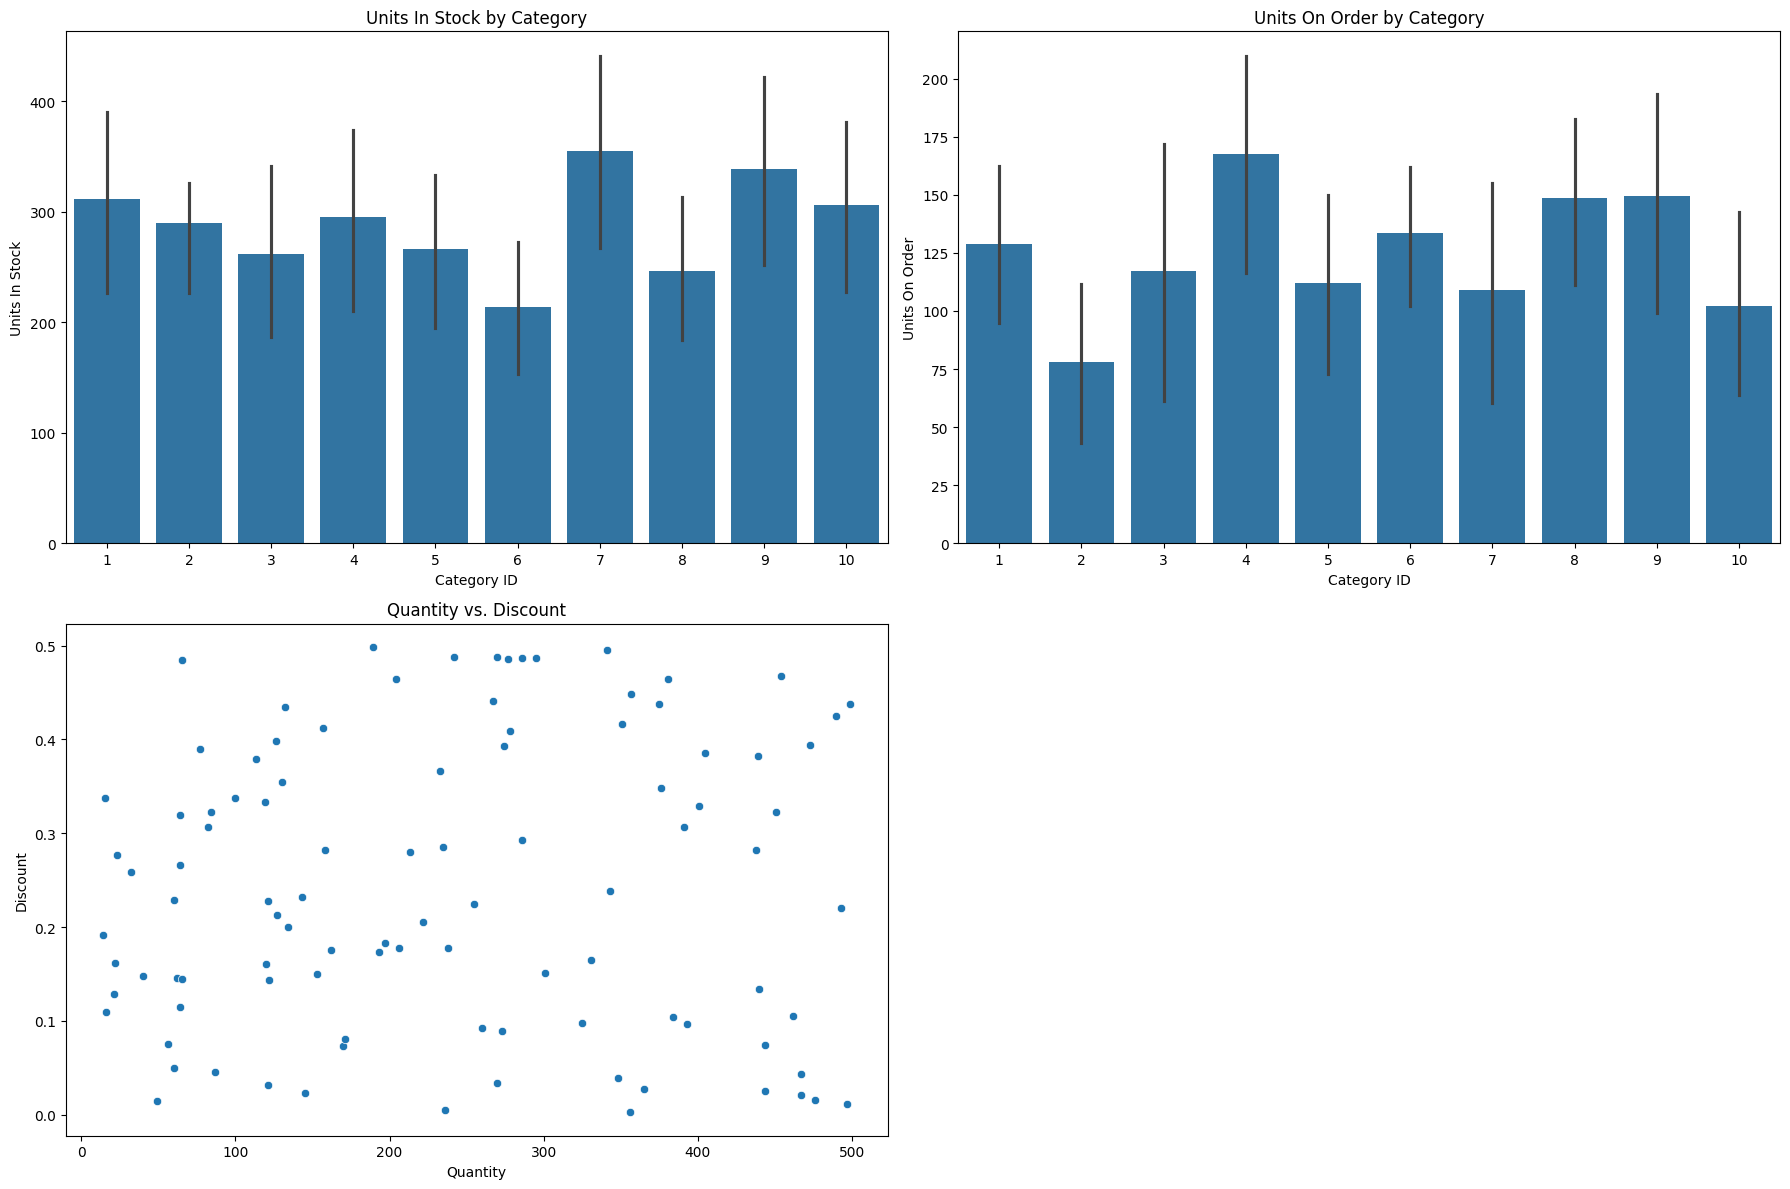

In [177]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Sample Data for Products
products_df = pd.DataFrame({
    'ProductID': range(1, 101),
    'SupplierID': np.random.randint(1, 11, 100),
    'CategoryID': np.random.randint(1, 11, 100),
    'UnitsInStock': np.random.randint(30, 511, 100),
    'UnitsOnOrder': np.random.randint(10, 251, 100),
    'ReorderLevel': np.random.randint(5, 204, 100),
    'Discontinued': np.zeros(100)
})

# Sample Data for Customers
customers_df = pd.DataFrame({
    'CustomerID': range(1, 101),
    'Name': ['Customer_' + str(i) for i in range(1, 101)],
    'Age': np.random.randint(18, 70, 100),
    'Gender': np.random.choice(['Male', 'Female'], 100),
    'Address': ['Address_' + str(i) for i in range(1, 101)]
})

# Sample Data for Orders
orders_df = pd.DataFrame({
    'OrderID': range(1, 101),
    'CustomerID': np.random.randint(1, 101, 100),
    'OrderDate': pd.date_range(start='2022-01-01', periods=100, freq='D'),
    'ShipDate': pd.date_range(start='2022-01-01', periods=100, freq='D') + pd.to_timedelta(np.random.randint(1, 15, 100), unit='D'),
    'ShipperID': np.random.randint(1, 4, 100)
})

# Sample Data for Order Details
orderdetails_df = pd.DataFrame({
    'OrderDetailID': range(1, 101),
    'OrderID': np.random.randint(1, 101, 100),
    'ProductID': np.random.randint(1, 101, 100),
    'Quantity': np.random.randint(5, 501, 100),
    'Discount': np.random.uniform(0.0, 0.5, 100)
})

# Creating subplots
fig, axs = plt.subplots(2, 2, figsize=(18, 12))

# Bar Plot for Units In Stock by Category
sns.barplot(x='CategoryID', y='UnitsInStock', data=products_df, ax=axs[0, 0])
axs[0, 0].set_title('Units In Stock by Category')
axs[0, 0].set_xlabel('Category ID')
axs[0, 0].set_ylabel('Units In Stock')

# Bar Plot for Units On Order by Category
sns.barplot(x='CategoryID', y='UnitsOnOrder', data=products_df, ax=axs[0, 1])
axs[0, 1].set_title('Units On Order by Category')
axs[0, 1].set_xlabel('Category ID')
axs[0, 1].set_ylabel('Units On Order')

# Scatter Plot for Quantity vs. Discount
sns.scatterplot(x='Quantity', y='Discount', data=orderdetails_df, ax=axs[1, 0])
axs[1, 0].set_title('Quantity vs. Discount')
axs[1, 0].set_xlabel('Quantity')
axs[1, 0].set_ylabel('Discount')

# Hide the fourth subplot (bottom right)
axs[1, 1].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()


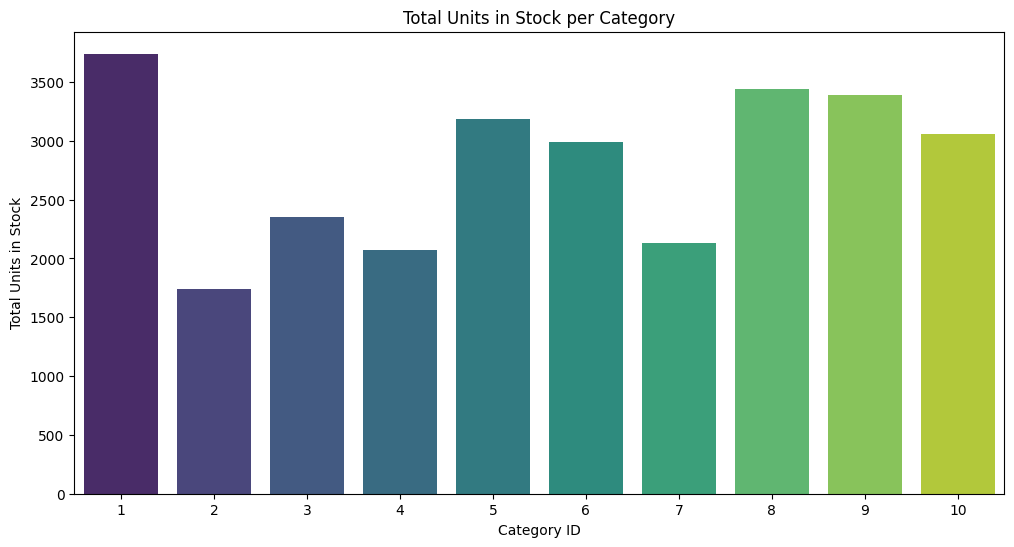

In [178]:
# Calculate the total units in stock per category
total_units_in_stock_per_category = products_df.groupby('CategoryID')['UnitsInStock'].sum().reset_index()

# Plot the total units in stock per category
plt.figure(figsize=(12, 6))
sns.barplot(x='CategoryID', y='UnitsInStock', data=total_units_in_stock_per_category, palette='viridis')
plt.title('Total Units in Stock per Category')
plt.xlabel('Category ID')
plt.ylabel('Total Units in Stock')
plt.show()


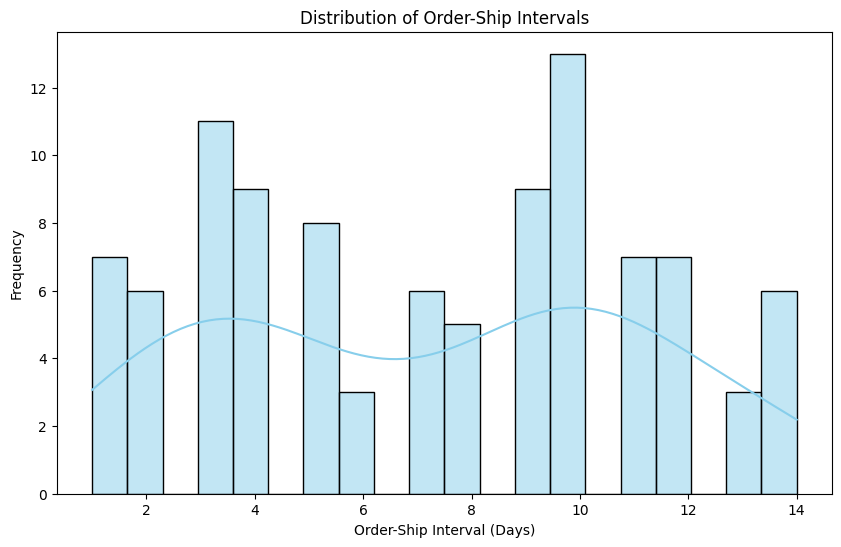

In [179]:
# Convert 'OrderDate' and 'ShipDate' to datetime objects
orders_df['OrderDate'] = pd.to_datetime(orders_df['OrderDate'])
orders_df['ShipDate'] = pd.to_datetime(orders_df['ShipDate'])

# Calculate the time interval between OrderDate and ShipDate
orders_df['Order_Ship_Interval'] = (orders_df['ShipDate'] - orders_df['OrderDate']).dt.days

# Plot the distribution of order-ship intervals
plt.figure(figsize=(10, 6))
sns.histplot(orders_df['Order_Ship_Interval'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Order-Ship Intervals')
plt.xlabel('Order-Ship Interval (Days)')
plt.ylabel('Frequency')
plt.show()



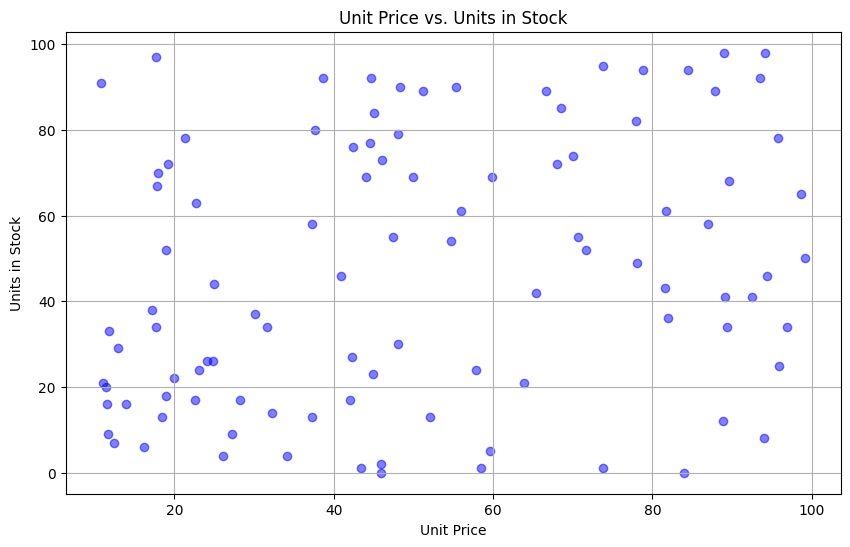

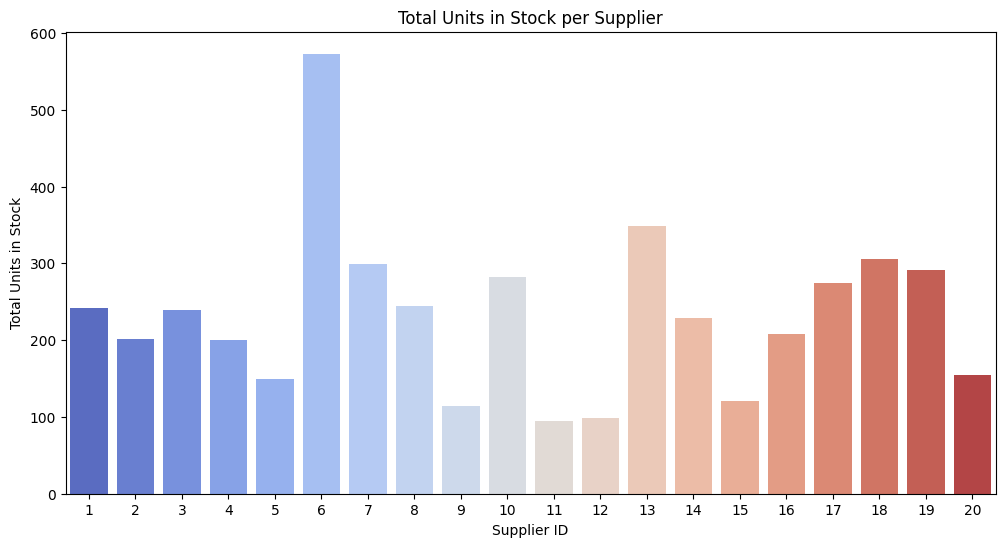

In [180]:
# Sample Data for Products
products_df = pd.DataFrame({
    'ProductID': range(1, 101),
    'SupplierID': np.random.randint(1, 21, 100),
    'UnitPrice': np.random.uniform(10, 100, 100),
    'UnitsInStock': np.random.randint(0, 100, 100)
})

# Individual Scatter Plot for Unit Price vs. Units in Stock
plt.figure(figsize=(10, 6))
plt.scatter(products_df['UnitPrice'], products_df['UnitsInStock'], color='blue', alpha=0.5)
plt.title('Unit Price vs. Units in Stock')
plt.xlabel('Unit Price')
plt.ylabel('Units in Stock')
plt.grid(True)
plt.show()

# Calculate the total units in stock per supplier
total_units_in_stock_per_supplier = products_df.groupby('SupplierID')['UnitsInStock'].sum().reset_index()

# Bar Plot for Total Units in Stock per Supplier
plt.figure(figsize=(12, 6))
sns.barplot(x='SupplierID', y='UnitsInStock', data=total_units_in_stock_per_supplier, palette='coolwarm')
plt.title('Total Units in Stock per Supplier')
plt.xlabel('Supplier ID')
plt.ylabel('Total Units in Stock')
plt.show()


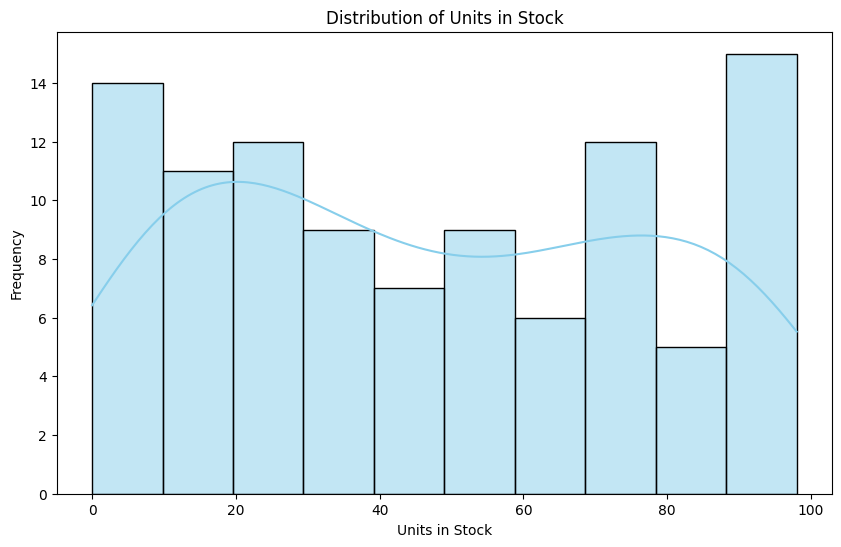

In [181]:
# Visualize Products Data
plt.figure(figsize=(10, 6))
sns.histplot(products_df['UnitsInStock'], bins=10, kde=True, color='skyblue')
plt.title('Distribution of Units in Stock')
plt.xlabel('Units in Stock')
plt.ylabel('Frequency')
plt.show()


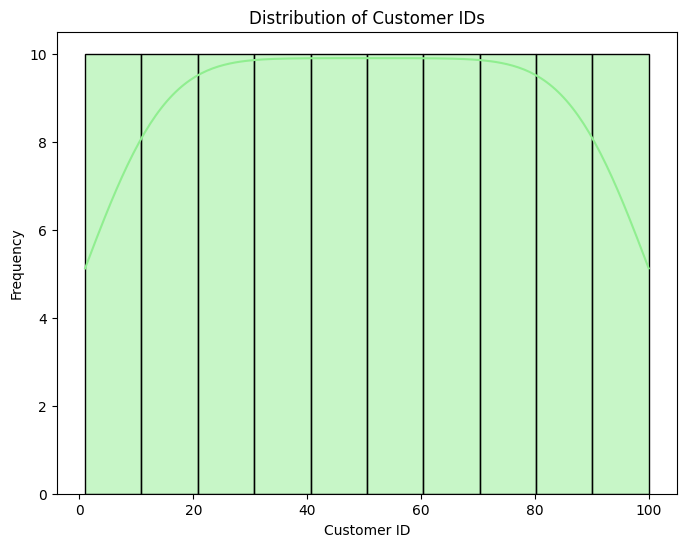

In [182]:
# Visualize Customers Data
plt.figure(figsize=(8, 6))
sns.histplot(customers_df['CustomerID'], bins=10, kde=True, color='lightgreen')
plt.title('Distribution of Customer IDs')
plt.xlabel('Customer ID')
plt.ylabel('Frequency')
plt.show()


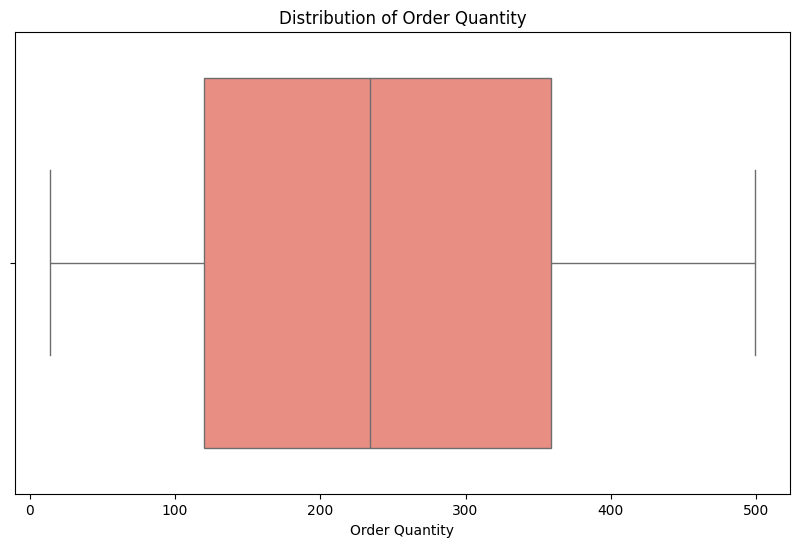

In [183]:
# Visualize Order Details Data
plt.figure(figsize=(10, 6))
sns.boxplot(x='Quantity', data=orderdetails_df, color='salmon')
plt.title('Distribution of Order Quantity')
plt.xlabel('Order Quantity')
plt.show()


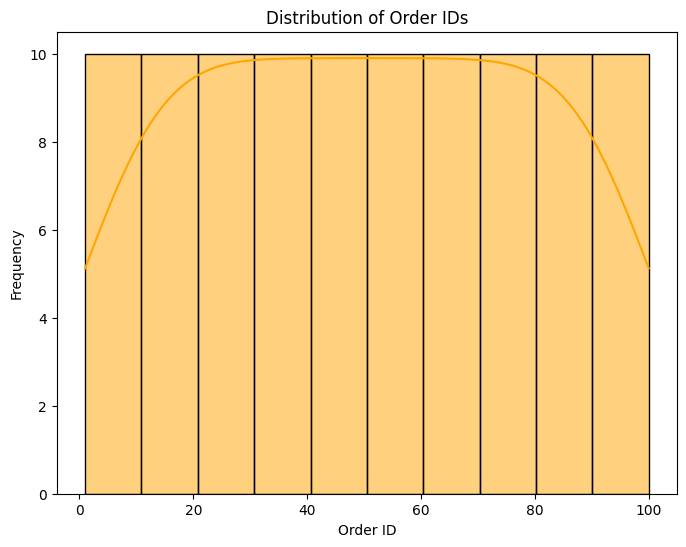

In [184]:
# Visualize Orders Data
plt.figure(figsize=(8, 6))
sns.histplot(orders_df['OrderID'], bins=10, kde=True, color='orange')
plt.title('Distribution of Order IDs')
plt.xlabel('Order ID')
plt.ylabel('Frequency')
plt.show()


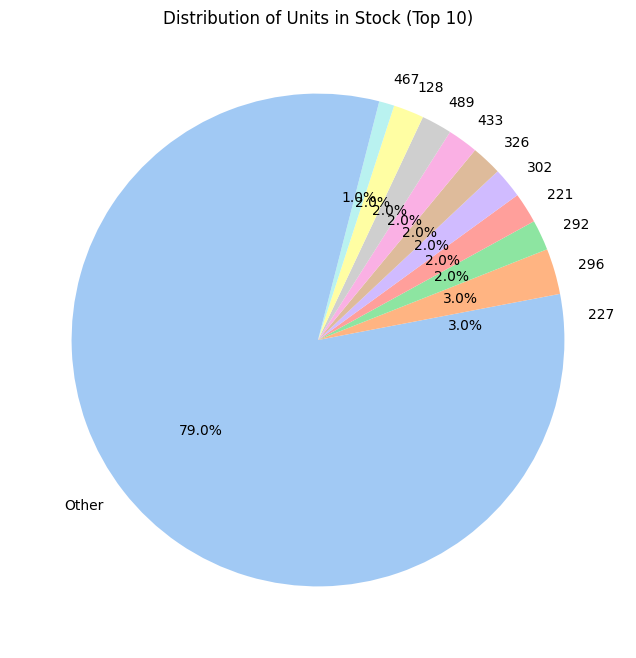

In [185]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Sample Data
products_df = pd.DataFrame({
    'ProductID': range(1, 101),
    'SupplierID': np.random.randint(1, 21, 100),
    'UnitPrice': np.random.uniform(5, 100, 100),
    'UnitsInStock': np.random.randint(10, 500, 100)
})

# Calculate the value counts of UnitsInStock
units_in_stock_counts = products_df['UnitsInStock'].value_counts()

# Select the top 10 values and group the rest as 'Other'
top_n = 10
if len(units_in_stock_counts) > top_n:
    top_units_in_stock_counts = units_in_stock_counts.nlargest(top_n)
    other_units_in_stock_count = units_in_stock_counts.iloc[top_n:].sum()
    top_units_in_stock_counts['Other'] = other_units_in_stock_count
else:
    top_units_in_stock_counts = units_in_stock_counts

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(top_units_in_stock_counts, labels=top_units_in_stock_counts.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Distribution of Units in Stock (Top 10)')
plt.show()


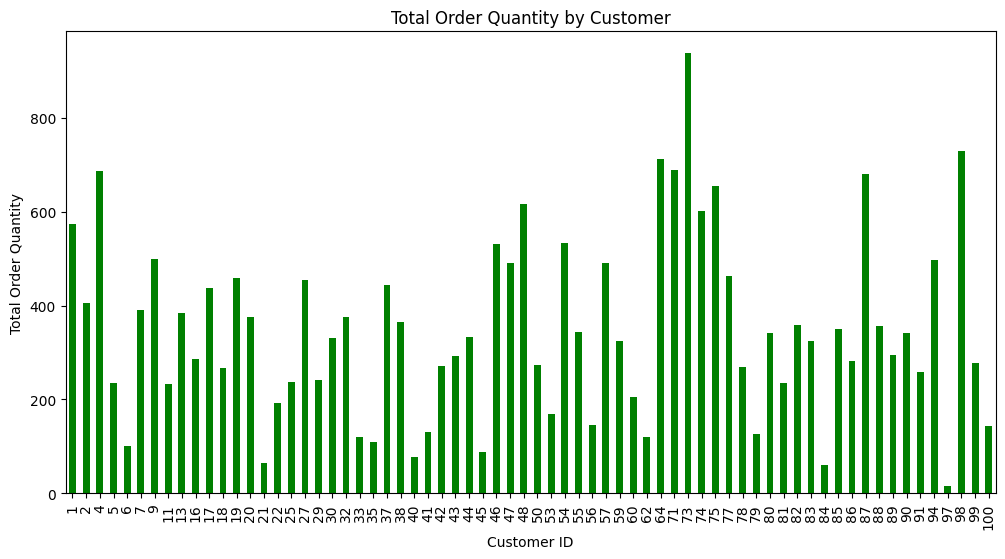

In [186]:
# Bar Plot of Total Order Quantity by Customer
total_order_quantity_by_customer = orderdetails_df.groupby('OrderID')['Quantity'].sum()
plt.figure(figsize=(12, 6))
total_order_quantity_by_customer.plot(kind='bar', color='green')
plt.title('Total Order Quantity by Customer')
plt.xlabel('Customer ID')
plt.ylabel('Total Order Quantity')
plt.show()


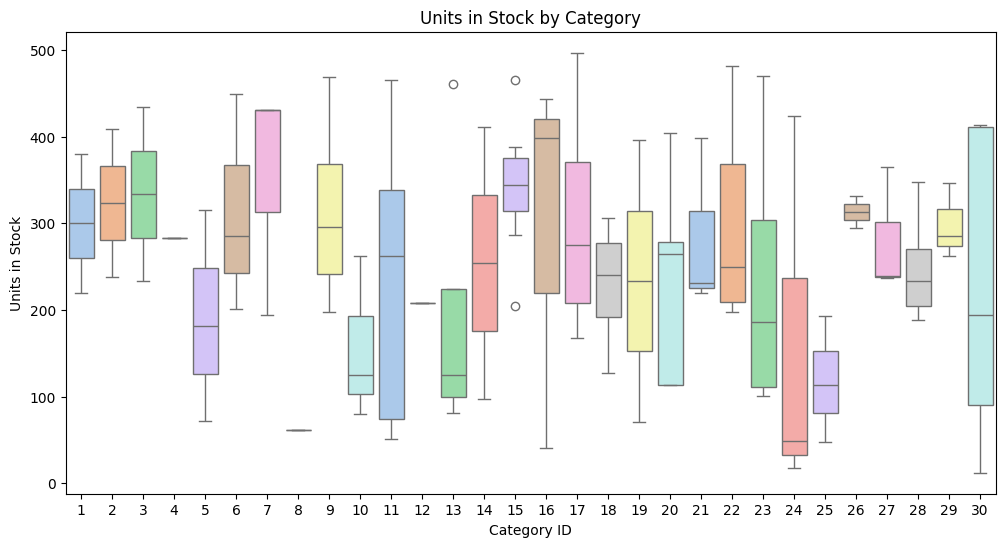

In [187]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Sample Data for Products (including CategoryID)
products_df = pd.DataFrame({
    'ProductID': range(1, 101),
    'SupplierID': np.random.randint(1, 21, 100),
    'CategoryID': np.random.randint(1, 31, 100),
    'UnitsInStock': np.random.randint(10, 500, 100),
    'UnitsOnOrder': np.random.randint(0, 100, 100),
    'ReorderLevel': np.random.randint(1, 50, 100),
    'Discontinued': np.random.choice([0, 1], 100)
})

# Boxplot of Units in Stock by Category
plt.figure(figsize=(12, 6))
sns.boxplot(x='CategoryID', y='UnitsInStock', data=products_df, palette='pastel')
plt.title('Units in Stock by Category')
plt.xlabel('Category ID')
plt.ylabel('Units in Stock')
plt.show()


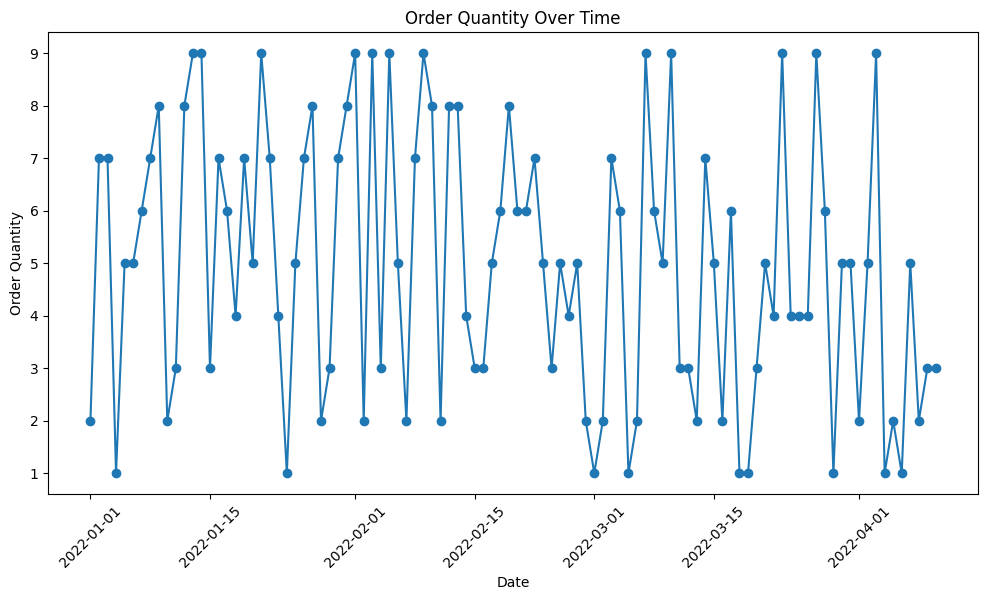

In [188]:
# Line Plot of Order Quantity Over Time
orders_df['OrderDate'] = pd.date_range(start='2022-01-01', periods=100, freq='D')
orders_df['Quantity'] = np.random.randint(1, 10, 100)
plt.figure(figsize=(12, 6))
plt.plot(orders_df['OrderDate'], orders_df['Quantity'], marker='o', linestyle='-')
plt.title('Order Quantity Over Time')
plt.xlabel('Date')
plt.ylabel('Order Quantity')
plt.xticks(rotation=45)
plt.show()


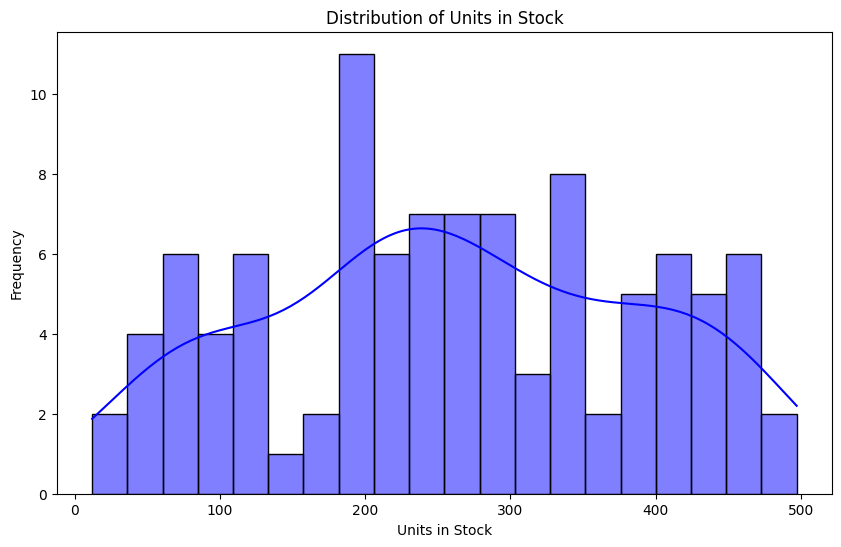

In [189]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of Units in Stock
plt.figure(figsize=(10, 6))
sns.histplot(products_df['UnitsInStock'], bins=20, kde=True, color='blue')
plt.title('Distribution of Units in Stock')
plt.xlabel('Units in Stock')
plt.ylabel('Frequency')
plt.show()


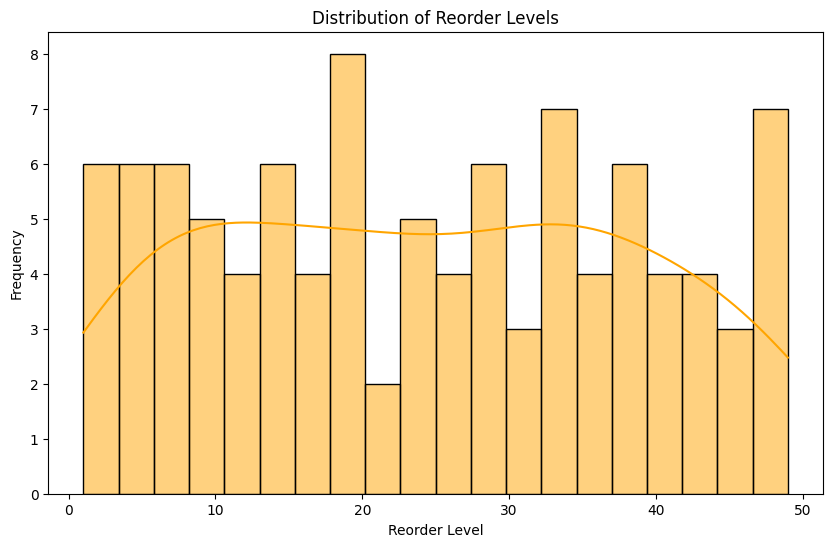

In [190]:
import matplotlib.pyplot as plt
import seaborn as sns
# Histogram of Reorder Levels
plt.figure(figsize=(10, 6))
sns.histplot(products_df['ReorderLevel'], bins=20, kde=True, color='orange')
plt.title('Distribution of Reorder Levels')
plt.xlabel('Reorder Level')
plt.ylabel('Frequency')
plt.show()


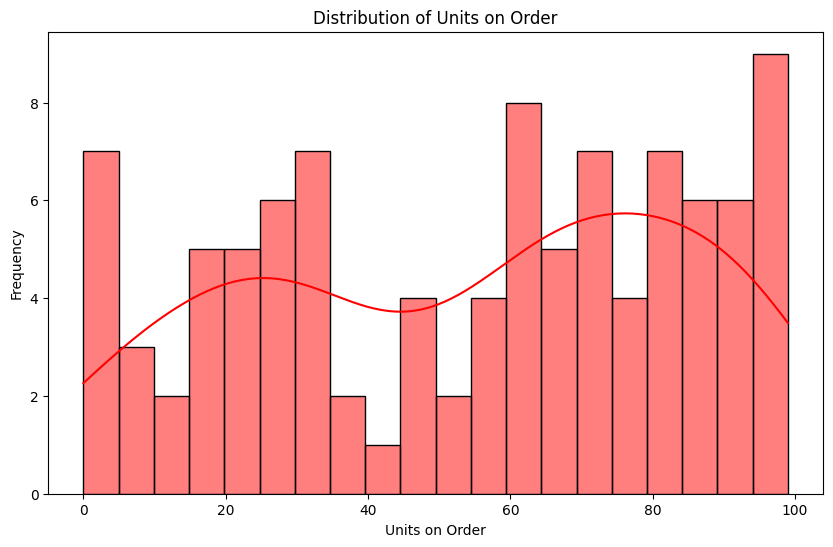

In [191]:
import matplotlib.pyplot as plt
import seaborn as sns
# Histogram of Units on Order
plt.figure(figsize=(10, 6))
sns.histplot(products_df['UnitsOnOrder'], bins=20, kde=True, color='red')
plt.title('Distribution of Units on Order')
plt.xlabel('Units on Order')
plt.ylabel('Frequency')
plt.show()
